In [1]:
import numpy as np
import os.path
import glob
import PIL.Image as img
from sklearn.metrics import confusion_matrix

In [151]:
_FOLDER_FILES = {
    'left_prediction': '/home/jiarui/git/Deeplab_KITTI/confusion matrix/leftvis',
    'ground_truth': '/home/jiarui/git/Dataset/KITTI/Segmentation/training/semantic',
}

_PATTERN_MAP = {
    'left_prediction': '_10.png',
    'ground_truth': '_10.png',
}

_CITYSCAPES_EVAL_ID_TO_TRAIN_ID = [255 , 255 , 255 , 255 , 255 , 255 , 255 , 0 , 1 , 255 ,
                                   255 , 2 , 3 , 4 , 255 ,255 , 255 , 5 , 255 , 6 , 7 , 8 ,
                                   9 , 10 , 11 , 12 , 13 ,14 , 15 , 255 , 255 , 16 , 17 , 18]

LABEL_NAMES = np.asarray([
    'road', 'sidewalk', 'building', 'wall', 'fence', 'pole',
    'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck',
    'bus', 'train', 'motorcycle', 'bicycle'
])

In [4]:
def _get_files(data):
    pattern = '*%s' % (_PATTERN_MAP[data])
    searchFiles = os.path.join(_FOLDER_FILES[data], pattern)
    fileNames = glob.glob(searchFiles)
    return sorted(fileNames)

In [158]:
def _convert_eval_id_to_train_id(prediction, eval_id_to_train_id):
    converted_prediction = prediction.copy()
    for eval_id,train_id in enumerate(eval_id_to_train_id):
        converted_prediction[prediction == eval_id] = train_id
        print(eval_id,train_id)

    return converted_prediction

In [153]:
gtFiles = _get_files('ground_truth')

In [154]:
gt = img.open(gtFiles[80])

In [155]:
gt_arr = np.asarray(gt)
gt_arr

array([[23, 23, 23, ..., 23, 23, 23],
       [23, 23, 23, ..., 23, 23, 23],
       [23, 23, 23, ..., 23, 23, 23],
       ...,
       [ 7,  7,  7, ...,  8,  8,  8],
       [ 7,  7,  7, ...,  8,  8,  8],
       [ 7,  7,  7, ...,  8,  8,  8]], dtype=uint8)

In [156]:
np.unique(gt_arr)

array([ 0,  4,  5,  7,  8, 11, 13, 17, 19, 20, 21, 22, 23, 26, 27, 30],
      dtype=uint8)

In [160]:
gt_arr2 = _convert_eval_id_to_train_id(gt_arr, _CITYSCAPES_EVAL_ID_TO_TRAIN_ID )
np.unique(gt_arr2)

0 255
1 255
2 255
3 255
4 255
5 255
6 255
7 0
8 1
9 255
10 255
11 2
12 3
13 4
14 255
15 255
16 255
17 5
18 255
19 6
20 7
21 8
22 9
23 10
24 11
25 12
26 13
27 14
28 15
29 255
30 255
31 16
32 17
33 18


array([  0,   1,   2,   4,   5,   6,   7,   8,   9,  10,  13,  14, 255],
      dtype=uint8)

In [9]:
preFiles = _get_files('left_prediction')
prediction = img.open(preFiles[0])
pre_arr = np.asarray(prediction)
pre_arr

array([[21, 21, 21, ..., 11, 11, 11],
       [21, 21, 21, ..., 11, 11, 11],
       [21, 21, 21, ..., 11, 11, 11],
       ...,
       [ 7,  7,  7, ..., 26, 26, 26],
       [ 7,  7,  7, ..., 26, 26, 26],
       [ 7,  7,  7, ..., 26, 26, 26]], dtype=uint8)

In [10]:
pre_arr = _convert_eval_id_to_train_id(pre_arr, _CITYSCAPES_TRAIN_ID_TO_EVAL_ID )
gt_arr = _convert_eval_id_to_train_id(gt_arr, _CITYSCAPES_TRAIN_ID_TO_EVAL_ID )
pre_arr

array([[ 8,  8,  8, ...,  2,  2,  2],
       [ 8,  8,  8, ...,  2,  2,  2],
       [ 8,  8,  8, ...,  2,  2,  2],
       ...,
       [ 0,  0,  0, ..., 13, 13, 13],
       [ 0,  0,  0, ..., 13, 13, 13],
       [ 0,  0,  0, ..., 13, 13, 13]], dtype=uint8)

In [11]:
gt_list = gt_arr.reshape([-1]).tolist()

In [12]:
pre_list = pre_arr.reshape([-1]).tolist()
pre_list

[8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [77]:
conf_arr = confusion_matrix(gt_list, pre_list)

In [78]:
conf_mtrx = np.matrix(conf_arr)
conf_mtrx

matrix([[112614,   1704,     62,      0,      0,      0,      0,    442,
              3,      0,      0,   1236,      0,      0,      0],
        [   846,   4290,     54,    637,      0,    133,      0,    381,
             30,      0,      3,   1415,      0,      0,      0],
        [     0,      0,  92555,      0,      9,    377,      2,   4544,
              0,    474,     37,      4,      0,      0,      0],
        [     0,     30,   1080,   3221,      2,      0,      0,    190,
              0,      2,      0,     85,      0,      0,      0],
        [     0,     11,  12619,    703,   3245,    340,      0,   1203,
              0,      0,     72,    283,      0,      0,      0],
        [     0,     42,    377,      0,      0,   1111,      0,     96,
              0,      0,     10,      0,      0,      0,      0],
        [     0,      0,     54,    928,      0,      0,    396,      3,
              0,      0,      2,    179,      0,      0,      0],
        [    27,   1321,   

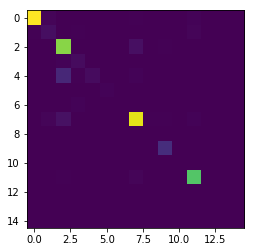

In [79]:
import matplotlib.pyplot as plt
plt.imshow(conf_mtrx)
plt.show()

In [80]:
conf_arr

array([[112614,   1704,     62,      0,      0,      0,      0,    442,
             3,      0,      0,   1236,      0,      0,      0],
       [   846,   4290,     54,    637,      0,    133,      0,    381,
            30,      0,      3,   1415,      0,      0,      0],
       [     0,      0,  92555,      0,      9,    377,      2,   4544,
             0,    474,     37,      4,      0,      0,      0],
       [     0,     30,   1080,   3221,      2,      0,      0,    190,
             0,      2,      0,     85,      0,      0,      0],
       [     0,     11,  12619,    703,   3245,    340,      0,   1203,
             0,      0,     72,    283,      0,      0,      0],
       [     0,     42,    377,      0,      0,   1111,      0,     96,
             0,      0,     10,      0,      0,      0,      0],
       [     0,      0,     54,    928,      0,      0,    396,      3,
             0,      0,      2,    179,      0,      0,      0],
       [    27,   1321,   4868,    115,  

In [83]:
import itertools

In [85]:
conf_arr.sum(axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan,  1.,  1.,  1.,  1.,
        1., nan])

In [89]:
conf_arr.shape
for i, j in itertools.product(range(conf_arr.shape[0]), range(conf_arr.shape[1])):
    print(i,j,conf_arr[i][j])

0 0 0.9703001008090573
0 1 0.014681934499961228
0 2 0.0005342018421347395
0 3 0.0
0 4 0.0
0 5 0.0
0 6 0.0
0 7 0.003808342164896046
0 8 2.5848476232326104e-05
0 9 0.0
0 10 0.0
0 11 0.010649572207718354
0 12 0.0
0 13 0.0
0 14 0.0
1 0 0.10861471305687508
1 1 0.5507767364231608
1 2 0.00693285402490692
1 3 0.08178200025677237
1 4 0.0
1 5 0.01707536269097445
1 6 0.0
1 7 0.048915136731287716
1 8 0.0038515855693927333
1 9 0.0
1 10 0.0003851585569392733
1 11 0.1816664526896906
1 12 0.0
1 13 0.0
1 14 0.0
2 0 0.0
2 1 0.0
2 2 0.9444195016428236
2 3 0.0
2 4 9.183486051305075e-05
2 5 0.0038468602681577925
2 6 2.0407746780677945e-05
2 7 0.04636640068570029
2 8 0.0
2 9 0.004836635987020673
2 10 0.000377543315442542
2 11 4.081549356135589e-05
2 12 0.0
2 13 0.0
2 14 0.0
3 0 0.0
3 1 0.006507592190889371
3 2 0.23427331887201736
3 3 0.6986984815618221
3 4 0.0004338394793926247
3 5 0.0
3 6 0.0
3 7 0.04121475054229935
3 8 0.0
3 9 0.0004338394793926247
3 10 0.0
3 11 0.01843817787418655
3 12 0.0
3 13 0.0
3 14 

In [84]:
conf_arr = conf_arr.astype('float') / conf_arr.sum(axis=1)

/home/jiarui/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [94]:
conf_arr[conf_arr=='nan']=0.0

/home/jiarui/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


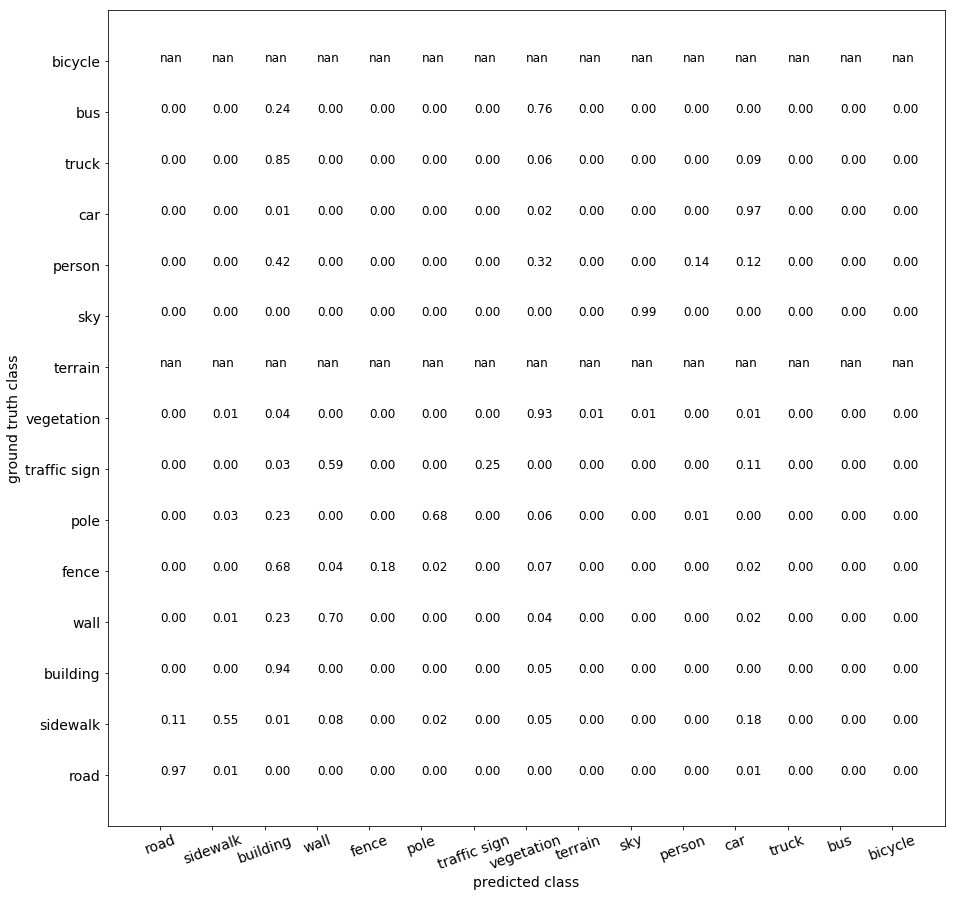

In [95]:

labels = np.unique(np.append(gt_arr, pre_arr))
labels_name = []
for i in labels:
    labels_name.append(LABEL_NAMES[i])
num_labels = len(labels)

plt.figure(figsize = (num_labels, num_labels))
#plt.subplot(211)
plt.xlim(0,num_labels+1)
plt.ylim(0,num_labels+1)
#plt.xticks(np.arange(num_labels)+1, labels)
#plt.yticks(np.arange(num_labels)+1, labels)
plt.xticks(np.arange(num_labels)+1, labels_name, fontsize=14, rotation=20)
plt.yticks(np.arange(num_labels)+1, labels_name, fontsize=14)
plt.xlabel('predicted class', fontsize=14)
plt.ylabel('ground truth class', fontsize=14)
for i in np.arange(num_labels):
    for j in np.arange(num_labels):
        plt.text(j+1, i+1, format(conf_arr[i][j], '.2f'), color='k', fontsize=12)
plt.show()

In [20]:
np.unique(pre_arr)

array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 13, 18], dtype=uint8)

In [21]:
np.unique(gt_arr)

array([ 0,  1,  2,  3,  4,  5,  7,  8, 10, 11, 13, 14, 15], dtype=uint8)

In [23]:
image_name = os.path.basename(preFiles[0])
image_name

'000000_10.png'

In [44]:
max(max(np.unique(pre_arr)), max(np.unique(gt_arr)))

18

In [48]:
labels = np.unique(np.append(gt_arr, pre_arr))
labels

array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 13, 14, 15, 18],
      dtype=uint8)

In [49]:
len(labels)

15

In [63]:
labels_name = []
for i in labels:
    labels_name.append(LABEL_NAMES[i])
    print(i,LABEL_NAMES[i])

0 road
1 sidewalk
2 building
3 wall
4 fence
5 pole
7 traffic sign
8 vegetation
9 terrain
10 sky
11 person
13 car
14 truck
15 bus
18 bicycle


In [64]:
labels_name

['road',
 'sidewalk',
 'building',
 'wall',
 'fence',
 'pole',
 'traffic sign',
 'vegetation',
 'terrain',
 'sky',
 'person',
 'car',
 'truck',
 'bus',
 'bicycle']

In [ ]:
LABEL_NAMES = np.asarray([
    'road', 'sidewalk', 'building', 'wall', 'fence', 'pole',
    'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck',
    'bus', 'train', 'motorcycle', 'bicycle'
])
_CITYSCAPES_TRAIN_ID_TO_EVAL_ID = [7, 8, 11, 12, 13, 17, 19, 20, 21, 22,
                                   23, 24, 25, 26, 27, 28, 31, 32, 33]

In [60]:
LABEL_NAMES

array(['road', 'sidewalk', 'building', 'wall', 'fence', 'pole',
       'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky',
       'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle',
       'bicycle'], dtype='<U13')

In [139]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm[np.isnan(cm)]=0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title, fontsize=18)
    plt.colorbar()
    ax = plt.gca()
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14, rotation=45)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=14)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)

Confusion matrix, without normalization
[[112614   1704     62      0      0      0      0    442      3      0
       0   1236      0      0      0]
 [   846   4290     54    637      0    133      0    381     30      0
       3   1415      0      0      0]
 [     0      0  92555      0      9    377      2   4544      0    474
      37      4      0      0      0]
 [     0     30   1080   3221      2      0      0    190      0      2
       0     85      0      0      0]
 [     0     11  12619    703   3245    340      0   1203      0      0
      72    283      0      0      0]
 [     0     42    377      0      0   1111      0     96      0      0
      10      0      0      0      0]
 [     0      0     54    928      0      0    396      3      0      0
       2    179      0      0      0]
 [    27   1321   4868    115      0    204     23 108015    652    622
       0    913      0      0      2]
 [     0      0      0      0      0      0      0      0      0      0
       0

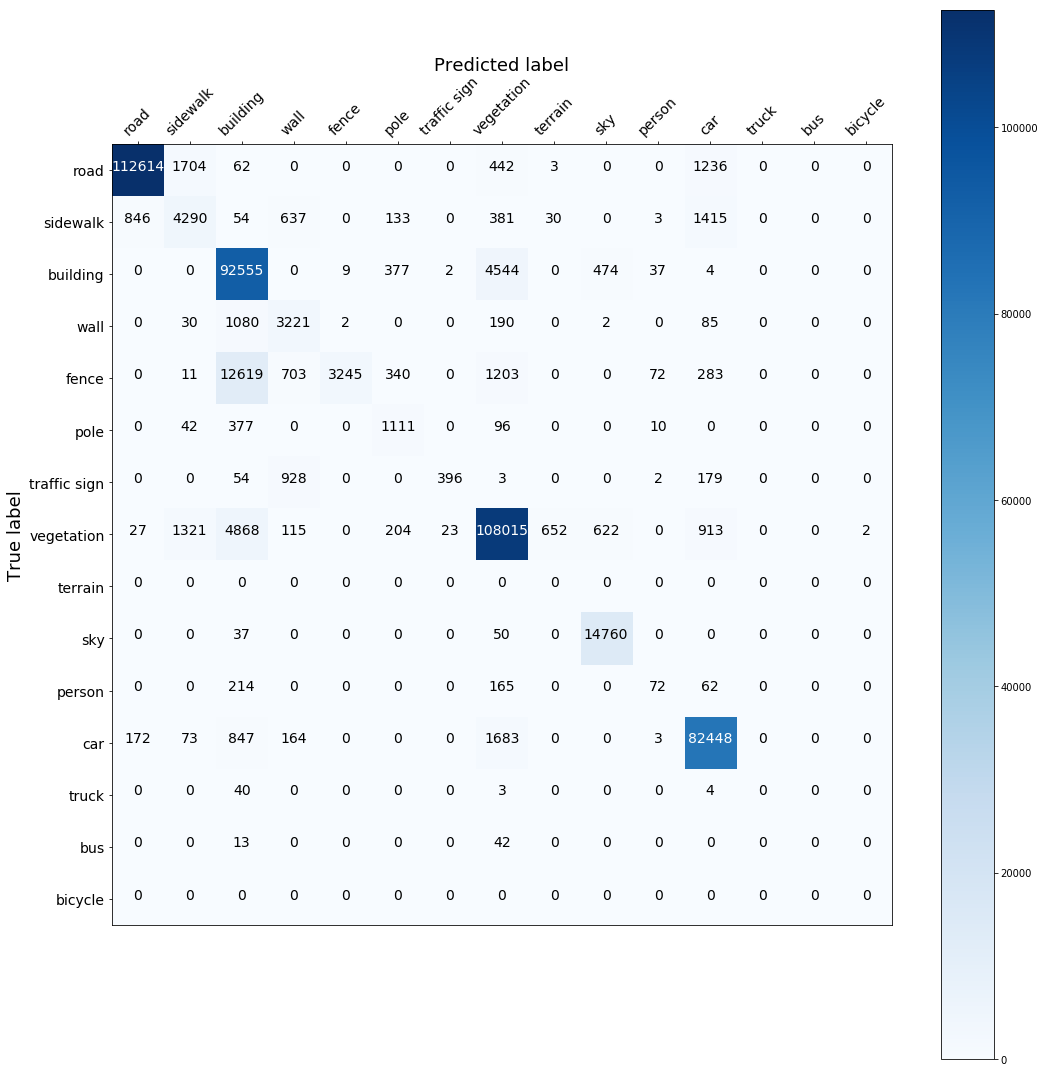

In [126]:
conf_arr = confusion_matrix(gt_list, pre_list)
plt.figure(figsize = (num_labels, num_labels))
plot_confusion_matrix(conf_arr, classes=labels_name,
                      title='Confusion matrix, without normalization')

/home/jiarui/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Normalized confusion matrix
[[9.70300101e-01 1.46819345e-02 5.34201842e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.80834216e-03
  2.58484762e-05 0.00000000e+00 0.00000000e+00 1.06495722e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.08614713e-01 5.50776736e-01 6.93285402e-03 8.17820003e-02
  0.00000000e+00 1.70753627e-02 0.00000000e+00 4.89151367e-02
  3.85158557e-03 0.00000000e+00 3.85158557e-04 1.81666453e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.44419502e-01 0.00000000e+00
  9.18348605e-05 3.84686027e-03 2.04077468e-05 4.63664007e-02
  0.00000000e+00 4.83663599e-03 3.77543315e-04 4.08154936e-05
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.50759219e-03 2.34273319e-01 6.98698482e-01
  4.33839479e-04 0.00000000e+00 0.00000000e+00 4.12147505e-02
  0.00000000e+00 4.33839479e-04 0.00000000e+00 1.84381779e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.95366963e-04 6.82

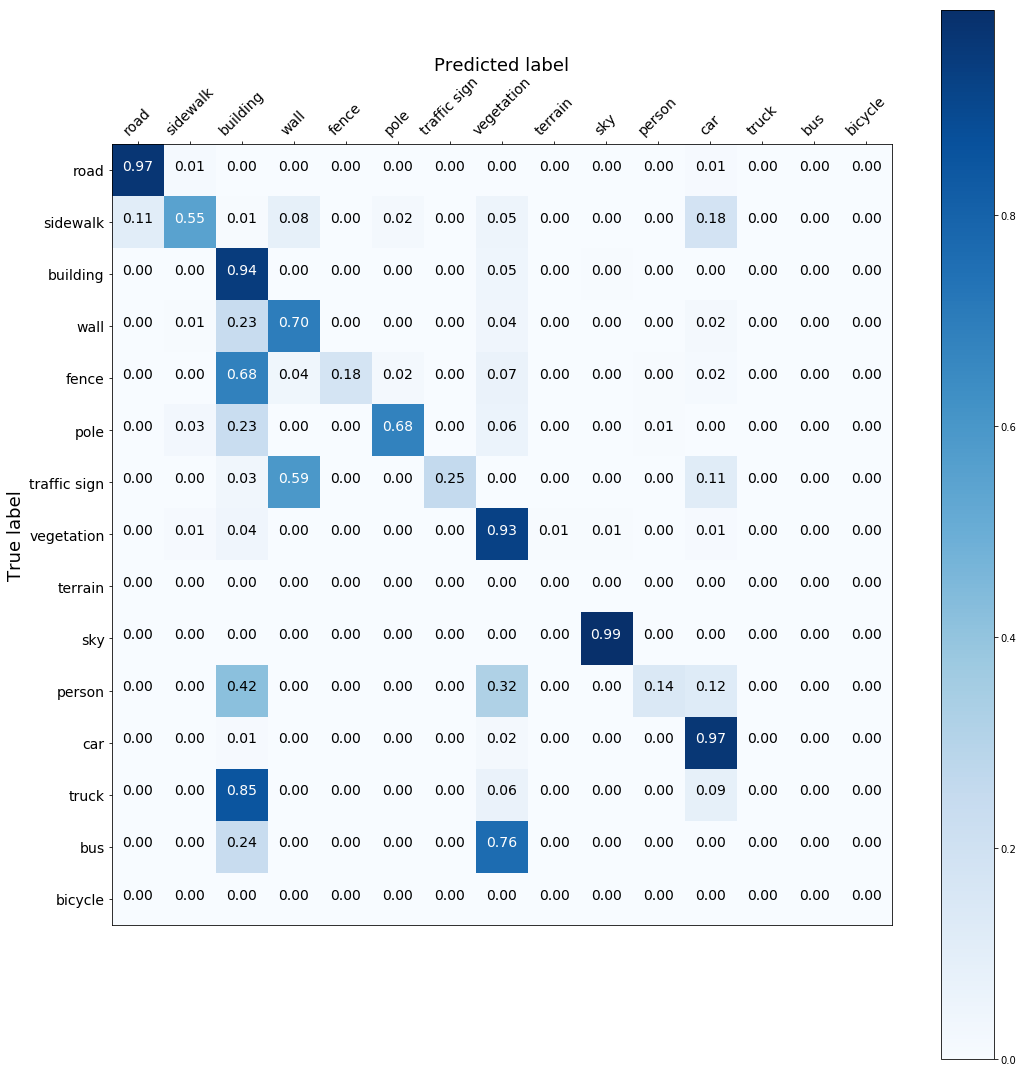

In [140]:
plt.figure(figsize = (num_labels, num_labels))
plot_confusion_matrix(conf_arr, classes=labels_name, normalize=True,
                      title='Normalized confusion matrix')

In [133]:
cm = conf_arr.copy()
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

/home/jiarui/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [134]:
cm

array([[9.70300101e-01, 1.46819345e-02, 5.34201842e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.80834216e-03,
        2.58484762e-05, 0.00000000e+00, 0.00000000e+00, 1.06495722e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.08614713e-01, 5.50776736e-01, 6.93285402e-03, 8.17820003e-02,
        0.00000000e+00, 1.70753627e-02, 0.00000000e+00, 4.89151367e-02,
        3.85158557e-03, 0.00000000e+00, 3.85158557e-04, 1.81666453e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.44419502e-01, 0.00000000e+00,
        9.18348605e-05, 3.84686027e-03, 2.04077468e-05, 4.63664007e-02,
        0.00000000e+00, 4.83663599e-03, 3.77543315e-04, 4.08154936e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.50759219e-03, 2.34273319e-01, 6.98698482e-01,
        4.33839479e-04, 0.00000000e+00, 0.00000000e+00, 4.12147505e-02,
        0.00000000e+00, 4.33839479e-0

In [137]:
cm[np.isnan(cm)]=0.0

In [138]:
cm

array([[9.70300101e-01, 1.46819345e-02, 5.34201842e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.80834216e-03,
        2.58484762e-05, 0.00000000e+00, 0.00000000e+00, 1.06495722e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.08614713e-01, 5.50776736e-01, 6.93285402e-03, 8.17820003e-02,
        0.00000000e+00, 1.70753627e-02, 0.00000000e+00, 4.89151367e-02,
        3.85158557e-03, 0.00000000e+00, 3.85158557e-04, 1.81666453e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.44419502e-01, 0.00000000e+00,
        9.18348605e-05, 3.84686027e-03, 2.04077468e-05, 4.63664007e-02,
        0.00000000e+00, 4.83663599e-03, 3.77543315e-04, 4.08154936e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.50759219e-03, 2.34273319e-01, 6.98698482e-01,
        4.33839479e-04, 0.00000000e+00, 0.00000000e+00, 4.12147505e-02,
        0.00000000e+00, 4.33839479e-0

In [144]:
preFiles[80]

'/home/jiarui/git/Deeplab_KITTI/confusion matrix/leftvis/000080_10.png'

In [163]:
for i in range(155,200):
    print(i)

155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
